In [1]:
import torch
import torchvision
from torchvision import transforms as T

from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

In [2]:
model= torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:02<00:00, 64.3MB/s]


In [3]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [5]:
!wget 'https://bikeshackleyton.com/cdn/shop/articles/shutterstock_211943116_1200x1200.jpg?v=1472662829'

--2024-09-22 18:39:55--  https://bikeshackleyton.com/cdn/shop/articles/shutterstock_211943116_1200x1200.jpg?v=1472662829
Resolving bikeshackleyton.com (bikeshackleyton.com)... 23.227.38.65, 2620:127:f00f:5::
Connecting to bikeshackleyton.com (bikeshackleyton.com)|23.227.38.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 288375 (282K) [image/jpeg]
Saving to: ‘shutterstock_211943116_1200x1200.jpg?v=1472662829’

shutterstock_211943 100%[===================>] 281.62K  --.-KB/s    in 0.03s   

2024-09-22 18:39:55 (8.24 MB/s) - ‘shutterstock_211943116_1200x1200.jpg?v=1472662829’ saved [288375/288375]



In [6]:
#Read the image
ig= Image.open('/content/shutterstock_211943116_1200x1200.jpg?v=1472662829')

In [7]:
transform= T.ToTensor()
img= transform(ig)

In [8]:
with torch.no_grad():
  pred= model([img])

In [9]:
pred

[{'boxes': tensor([[9.3408e+01, 2.7967e+02, 2.1723e+02, 5.6314e+02],
          [7.5512e+02, 2.4131e+02, 8.6992e+02, 5.3857e+02],
          [8.5853e+02, 2.5542e+02, 9.5817e+02, 5.0323e+02],
          [6.7123e+02, 2.9247e+02, 7.7108e+02, 5.2355e+02],
          [2.5440e+02, 2.6759e+02, 3.7931e+02, 5.3797e+02],
          [8.9032e-01, 2.8979e+02, 9.5903e+01, 5.1115e+02],
          [0.0000e+00, 3.7175e+02, 9.7314e+01, 5.7074e+02],
          [8.7161e+02, 3.6929e+02, 9.5721e+02, 5.6135e+02],
          [7.5820e+02, 8.5069e+01, 9.6043e+02, 3.1510e+02],
          [4.8946e+02, 2.6691e+02, 5.8969e+02, 5.4599e+02],
          [1.2177e+02, 4.0116e+02, 2.0188e+02, 5.9653e+02],
          [5.7941e+02, 2.6797e+02, 6.4571e+02, 3.8059e+02],
          [2.3819e+02, 0.0000e+00, 7.3115e+02, 4.4212e+02],
          [2.6183e+02, 3.8980e+02, 3.9064e+02, 5.6089e+02],
          [4.5527e+02, 3.9371e+02, 5.0336e+02, 5.3927e+02],
          [5.0976e+02, 4.0234e+02, 5.7707e+02, 5.7671e+02],
          [4.4497e+02, 2.8421e+

In [10]:
type(pred)

list

In [11]:
len(pred)

1

In [12]:
pred[0]

{'boxes': tensor([[9.3408e+01, 2.7967e+02, 2.1723e+02, 5.6314e+02],
         [7.5512e+02, 2.4131e+02, 8.6992e+02, 5.3857e+02],
         [8.5853e+02, 2.5542e+02, 9.5817e+02, 5.0323e+02],
         [6.7123e+02, 2.9247e+02, 7.7108e+02, 5.2355e+02],
         [2.5440e+02, 2.6759e+02, 3.7931e+02, 5.3797e+02],
         [8.9032e-01, 2.8979e+02, 9.5903e+01, 5.1115e+02],
         [0.0000e+00, 3.7175e+02, 9.7314e+01, 5.7074e+02],
         [8.7161e+02, 3.6929e+02, 9.5721e+02, 5.6135e+02],
         [7.5820e+02, 8.5069e+01, 9.6043e+02, 3.1510e+02],
         [4.8946e+02, 2.6691e+02, 5.8969e+02, 5.4599e+02],
         [1.2177e+02, 4.0116e+02, 2.0188e+02, 5.9653e+02],
         [5.7941e+02, 2.6797e+02, 6.4571e+02, 3.8059e+02],
         [2.3819e+02, 0.0000e+00, 7.3115e+02, 4.4212e+02],
         [2.6183e+02, 3.8980e+02, 3.9064e+02, 5.6089e+02],
         [4.5527e+02, 3.9371e+02, 5.0336e+02, 5.3927e+02],
         [5.0976e+02, 4.0234e+02, 5.7707e+02, 5.7671e+02],
         [4.4497e+02, 2.8421e+02, 4.9506e+02, 4

In [13]:
type(pred[0])

dict

In [14]:
pred[0].keys()

dict_keys(['boxes', 'labels', 'scores'])

In [15]:
bboxes, labels, scores= pred[0]['boxes'], pred[0]['labels'], pred[0]['scores']

In [20]:
num = torch.argwhere(scores > 0.8).shape[0]

In [17]:
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" ,
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" ,
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" ,
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" ,
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

In [21]:
igg= cv2.imread('/content/shutterstock_211943116_1200x1200.jpg?v=1472662829')
for i in range(num):
  x1, y1, x2, y2 = bboxes[i].numpy().astype('int')
  class_name = coco_names[labels.numpy()[i]-1]
  igg= cv2.rectangle(igg, (x1, y1), (x2, y2), (0, 255, 0), 1)
  igg= cv2.putText(igg, class_name, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0, 0), 1, cv2.LINE_AA)

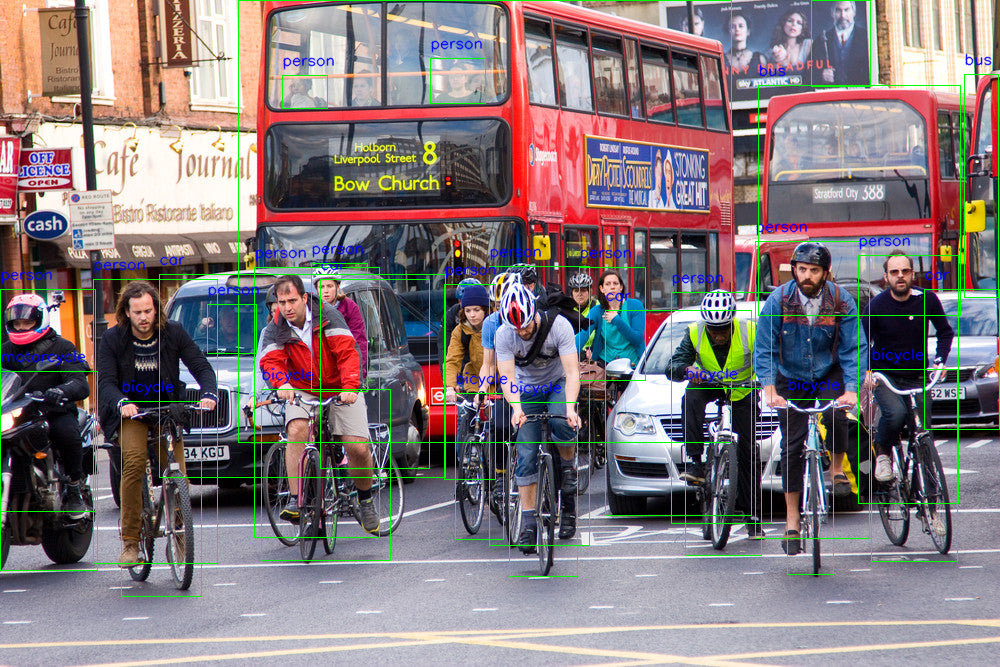

In [22]:
cv2_imshow(igg)

In [ ]:
import streamlit as st
import torch
import torchvision
from torchvision import transforms as T
from PIL import Image
import numpy as np
import cv2

# Load the pre-trained model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# COCO class names
coco_names = [
    "person", "bicycle", "car", "motorcycle", "airplane", "bus", "train", "truck", "boat",
    "traffic light", "fire hydrant", "street sign", "stop sign", "parking meter", "bench",
    "bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe",
    "hat", "backpack", "umbrella", "shoe", "eye glasses", "handbag", "tie", "suitcase",
    "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat", "baseball glove",
    "skateboard", "surfboard", "tennis racket", "bottle", "plate", "wine glass", "cup",
    "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli",
    "carrot", "hot dog", "pizza", "donut", "cake", "chair", "couch", "potted plant", "bed",
    "mirror", "dining table", "window", "desk", "toilet", "door", "tv", "laptop", "mouse",
    "remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator",
    "blender", "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush", "hair brush"
]

# Function to process the image and make predictions
def process_image(uploaded_file):
    # Open and transform the image
    image = Image.open(uploaded_file).convert("RGB")
    transform = T.ToTensor()
    img_tensor = transform(image)

    with torch.no_grad():
        pred = model([img_tensor])

    return image, pred

# Function to draw bounding boxes
def draw_boxes(image, pred):
    bboxes, labels, scores = pred[0]['boxes'], pred[0]['labels'], pred[0]['scores']
    num = torch.argwhere(scores > 0.8).shape[0]
    
    # Convert the image to a format suitable for OpenCV
    image_np = np.array(image)
    image_cv = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)

    for i in range(num):
        x1, y1, x2, y2 = bboxes[i].numpy().astype('int')
        class_name = coco_names[labels.numpy()[i] - 1]
        image_cv = cv2.rectangle(image_cv, (x1, y1), (x2, y2), (0, 255, 0), 1)
        image_cv = cv2.putText(image_cv, class_name, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)
    
    return image_cv

# Streamlit app
def main():
    st.title("Object Detection with Faster R-CNN")

    uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

    if uploaded_file is not None:
        st.image(uploaded_file, caption='Uploaded Image.', use_column_width=True)
        
        image, pred = process_image(uploaded_file)
        output_image = draw_boxes(image, pred)

        st.image(output_image, caption='Detected Objects', channels="BGR", use_column_width=True)

if __name__ == "__main__":
    main()
